In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from numpy import nan as NA
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import seaborn as sns
import os

#Algorithms
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

## Data Cleaning

In [2]:
os.chdir('D:\Bharati AXA Data')
data = pd.read_csv('insurance_claims.csv')

In [3]:
data.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,...,2,YES,51590,9380,9380,32830,Audi,A5,2015,N
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,...,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,...,1,?,42300,4700,4700,32900,Saab,92x,1996,N


In [4]:
data.columns.tolist()

['months_as_customer',
 'age',
 'policy_number',
 'policy_bind_date',
 'policy_state',
 'policy_csl',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'capital-gains',
 'capital-loss',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'property_damage',
 'bodily_injuries',
 'witnesses',
 'police_report_available',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_make',
 'auto_model',
 'auto_year',
 'fraud_reported']

Since there are <b>NA</b> values in the dataset, let's drop them and parse date columns as DateTime. Also drop unwanted columns by modifying read_csv 

In [5]:
data = pd.read_csv('insurance_claims.csv', 
                   usecols= ['months_as_customer', 
                             'age', 
                             'policy_bind_date',
                             'policy_state',
                             'policy_csl',
                             'policy_deductable',
                             'policy_annual_premium',
                             'umbrella_limit',
                             'insured_zip',
                             'insured_sex',
                             'insured_education_level',
                             'insured_occupation',
                             'insured_hobbies',
                             'insured_relationship',
                             'capital-gains',
                             'capital-loss',
                             'incident_date',
                             'incident_type',
                             'collision_type',
                             'incident_severity',
                             'authorities_contacted',
                             'incident_state',
                             'incident_city',
                             'incident_hour_of_the_day',
                             'number_of_vehicles_involved',
                             'property_damage',
                             'bodily_injuries',
                             'witnesses',
                             'police_report_available',
                             'total_claim_amount',
                             'injury_claim',
                             'property_claim',
                             'vehicle_claim',
                             'auto_year',
                             'fraud_reported'], 
                   na_values=['?'], na_filter = True, parse_dates = ['policy_bind_date','incident_date'], dayfirst = True)

In [6]:
data.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,YES,1,2,YES,71610,6510,13020,52080,2004,Y
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,NaN,0,0,NaN,5070,780,780,3510,2007,Y
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,NO,2,3,NO,34650,7700,3850,23100,2007,N
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,NaN,1,2,NO,63400,6340,6340,50720,2014,Y
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,NO,0,1,NO,6500,1300,650,4550,2009,N


## Handling mising values

In [7]:
data.isna().sum()

months_as_customer               0
age                              0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_availa

In [8]:
data.shape

(1000, 35)

Dropping <b>360 columns</b> from a dataset(containing NaN) that contains <b>1000 columns</b> might lead to a considerable loss of data. Since all three columns that contain NaN values are of categorical type, let's <b>replace</b> with it's <b>most occuring value i.e. mode

Replacing <b>NaN</b> in all three columns individually

In [9]:
data['collision_type'].fillna(data['collision_type'].value_counts().index[0], inplace = True)

In [10]:
data['property_damage'].fillna(data['property_damage'].value_counts().index[0], inplace = True)

In [11]:
data['police_report_available'].fillna(data['police_report_available'].value_counts().index[0], inplace = True)

In [12]:
data.head(10)

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,YES,1,2,YES,71610,6510,13020,52080,2004,Y
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,NO,0,0,NO,5070,780,780,3510,2007,Y
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,NO,2,3,NO,34650,7700,3850,23100,2007,N
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,NO,1,2,NO,63400,6340,6340,50720,2014,Y
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,NO,0,1,NO,6500,1300,650,4550,2009,N
5,256,39,2006-10-12,OH,250/500,1000,1351.10,0,478456,FEMALE,...,NO,0,2,NO,64100,6410,6410,51280,2003,Y
6,137,34,2000-06-04,IN,250/500,1000,1333.35,0,441716,MALE,...,NO,0,0,NO,78650,21450,7150,50050,2012,N
7,165,37,1990-02-03,IL,100/300,1000,1137.03,0,603195,MALE,...,NO,2,2,YES,51590,9380,9380,32830,2015,N
8,27,33,1997-02-05,IL,100/300,500,1442.99,0,601734,FEMALE,...,NO,1,1,YES,27700,2770,2770,22160,2012,N
9,212,42,2011-07-25,IL,100/300,500,1315.68,0,600983,MALE,...,NO,2,1,NO,42300,4700,4700,32900,1996,N


In [13]:
data.to_csv('D:\Bharati AXA Data\Data after cleaning.csv', index = False)

<b>Checking whether any column is left with NaN

In [14]:
data.isna().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_cla

In [15]:
data.dtypes

months_as_customer                      int64
age                                     int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted                  object
incident_state                    

# EDA - Plotting

Let’s see how many have been reported

In [16]:
data['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

247 cases of fraud were reported and 753 weren't reported ever

Let's plot <b>fraud reported v/s age_bins

In [17]:
data.age.max()

64

In [18]:
data['age_bins'] = pd.cut(data.age, bins = [0, 10, 20, 30, 40, 50, 60, 70], include_lowest = True, labels = ['0-10','11-20','21-30','31-40', '41-50', '51-60', '61-70'])

In [19]:
age_vs_fraud = pd.crosstab(data['age_bins'], data['fraud_reported'])

In [20]:
age_vs_fraud

fraud_reported,N,Y
age_bins,,
0-10,0,0
11-20,1,1
21-30,150,45
31-40,302,94
41-50,221,72
51-60,66,30
61-70,13,5


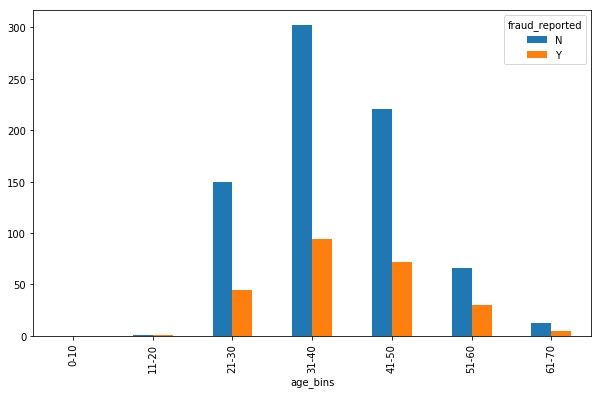

In [21]:
age_vs_fraud.plot(kind = 'bar', figsize = (10,6))

We can see that, highest no. of frauds have been reported in the age range of <b>30-40</b>. Since, fraud detection is highly dependent on age, so age becomes a top parameter for modeling.

Let's analyze <b>incident severity v/s fraud reported

In [22]:
incisev_vs_fraud = pd.crosstab(data['incident_severity'], data['fraud_reported'])

In [23]:
incisev_vs_fraud

fraud_reported,N,Y
incident_severity,,
Major Damage,109,167
Minor Damage,316,38
Total Loss,244,36
Trivial Damage,84,6


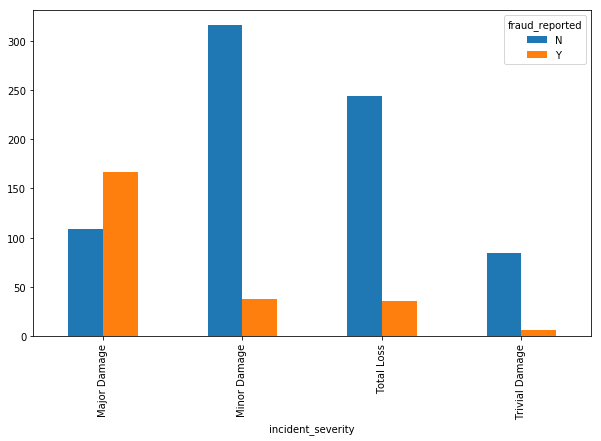

In [24]:
incisev_vs_fraud.plot(kind = 'bar', figsize = (10,6))

As we can observe that incidents involving <b>minor damage</b> have <b>higher cases</b> of <b>fraud report</b>. Hence, incident_severity becomes a parameter for modeling.

Now, let's analyze <b>total insurance claims v/s fraud reported.

In [25]:
print(data.total_claim_amount.min())
print(data.total_claim_amount.max())

100
114920


In [26]:
data['total_claim_bins'] = pd.cut(data.total_claim_amount, bins = [0, 11500, 33000, 44800, 56300, 67800, 79300, 90800, 102300, 113800, 125300], include_lowest = True, labels = ['0-11500','11501-33000','33001-44800','444801-56300', '56301-67800', '67801-79300', '79301-90800','90801-102300','102301-113800','113801-125300']) 

In [27]:
total_claim_vs_fraud = pd.crosstab(data.total_claim_bins, data.fraud_reported)

In [28]:
total_claim_vs_fraud

fraud_reported,N,Y
total_claim_bins,,
0-11500,162,16
11501-33000,19,3
33001-44800,63,19
444801-56300,127,58
56301-67800,174,58
67801-79300,118,57
79301-90800,64,24
90801-102300,20,9
102301-113800,5,3


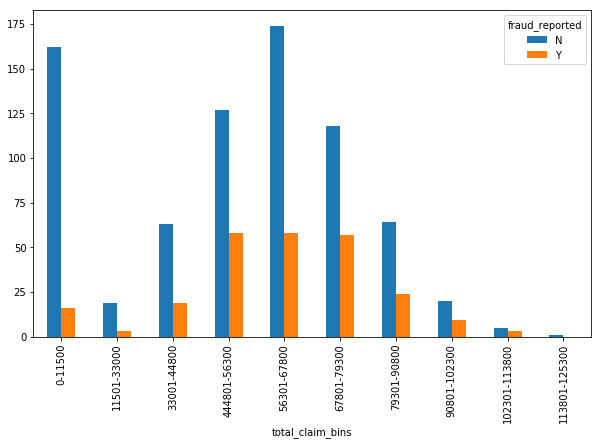

In [29]:
total_claim_vs_fraud.plot(kind = 'bar', figsize = (10,6))

We can clearly observe <b>significant amount of variation in reporting of fraud cases</b> according to the <b>Total insurance claim amount</b>. Since there is visibly good variation, it becomes a very important parameter for modeling.

Let's analyze fraud reporting <b>gender wise

In [30]:
gender_wise_fraud = pd.crosstab(data.insured_sex, data.fraud_reported)

In [31]:
gender_wise_fraud

fraud_reported,N,Y
insured_sex,,
FEMALE,411,126
MALE,342,121


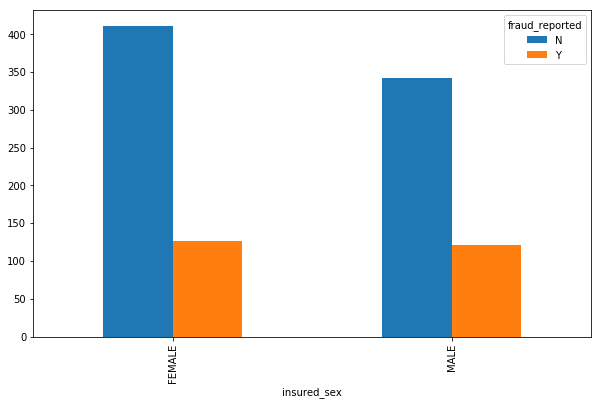

In [32]:
gender_wise_fraud.plot(kind = 'bar', figsize = (10,6))

Gender becomes an <b>important parameter</b> to figure out the no. of cases reported overall. Female leads with highest number of fraud reported cases.

Let's check relationship b/w <b>policy_annual_premium v/s fraud_reported

In [33]:
print(data.policy_annual_premium.min())
print(data.policy_annual_premium.max())

433.33
2047.59


In [34]:
data['policy_premium_bins'] = pd.cut(data.policy_annual_premium, bins = [0, 500, 1000, 1500, 2000], include_lowest = True, labels = ['0-500','501-1000','1001-1500','1501-2000']) 

In [35]:
policy_premium_vs_fraud = pd.crosstab(data.policy_premium_bins, data.fraud_reported)

In [36]:
policy_premium_vs_fraud

fraud_reported,N,Y
policy_premium_bins,,
0-500,1,1
501-1000,107,44
1001-1500,529,164
1501-2000,115,38


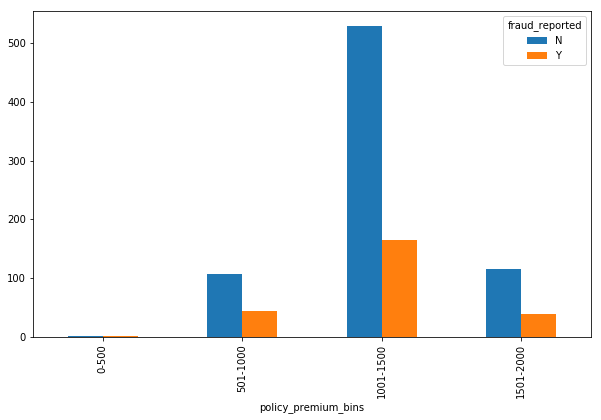

In [37]:
policy_premium_vs_fraud.plot(kind = 'bar', figsize = (10,6))

It is clearly visible that <b>fraud reporting</b> is <b>highly dependent</b> on <b>policy premium amount.

# Feature Selection

In [38]:
data[['policy_state', 'insured_education_level', 'insured_occupation','incident_type', 'collision_type', 'incident_severity', 'authorities_contacted']].describe()

,policy_state,insured_education_level,insured_occupation,incident_type,collision_type,incident_severity,authorities_contacted
count,1000,1000,1000,1000,1000,1000,1000
unique,3,7,14,4,3,4,5
top,OH,JD,machine-op-inspct,Multi-vehicle Collision,Rear Collision,Minor Damage,Police
freq,352,161,93,419,470,354,292


Let's drop insured_education_level, insured_occupation,	authorities_contacted since they have very high unique values which will lead to higher number of independent states. Also, dropping other columns that wouldn't be required for modeling.

In [39]:
data.drop(columns = ['policy_bind_date','policy_csl','insured_zip','insured_education_level','insured_occupation', 'insured_occupation','insured_hobbies','insured_relationship', 'incident_date', 'incident_state', 'incident_city', 'incident_type', 'authorities_contacted', 'property_damage', 'injury_claim', 'property_claim', 'vehicle_claim','age_bins', 'total_claim_bins', 'policy_premium_bins'], axis = 1, inplace = True)

In [40]:
data.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,capital-gains,capital-loss,collision_type,incident_severity,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_year,fraud_reported
0,328,48,OH,1000,1406.91,0,MALE,53300,0,Side Collision,Major Damage,5,1,1,2,YES,71610,2004,Y
1,228,42,IN,2000,1197.22,5000000,MALE,0,0,Rear Collision,Minor Damage,8,1,0,0,NO,5070,2007,Y
2,134,29,OH,2000,1413.14,5000000,FEMALE,35100,0,Rear Collision,Minor Damage,7,3,2,3,NO,34650,2007,N
3,256,41,IL,2000,1415.74,6000000,FEMALE,48900,-62400,Front Collision,Major Damage,5,1,1,2,NO,63400,2014,Y
4,228,44,IL,1000,1583.91,6000000,MALE,66000,-46000,Rear Collision,Minor Damage,20,1,0,1,NO,6500,2009,N


In [41]:
data.dtypes

months_as_customer               int64
age                              int64
policy_state                    object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                     object
capital-gains                    int64
capital-loss                     int64
collision_type                  object
incident_severity               object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
bodily_injuries                  int64
witnesses                        int64
police_report_available         object
total_claim_amount               int64
auto_year                        int64
fraud_reported                  object
dtype: object

### Let's convert all categorical variable to numerical using ONE HOT ENCODING

In [42]:
data_onehot = data[['policy_state','insured_sex', 'collision_type', 'incident_severity', 'police_report_available']]

In [43]:
from sklearn.preprocessing import OneHotEncoder

In [44]:
enc = OneHotEncoder(sparse = False)

In [45]:
enc.fit(data_onehot)

OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=False)

In [46]:
data_onehot_transformed = enc.transform(data_onehot)

In [47]:
data_onehot_transformed

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [48]:
data_onehot_transformed.shape

(1000, 14)

In [49]:
columns = ['OH', 'IN', 'IL', 
                                'Insured_Male', 'Insured_Female',
                                'Side_Collison','Rear _Collison','Front Collison',
                                'Major Damage','Minor Damage','Total Loss','Trivial Damage'
                                'Police Report available', 'Police report not available']

In [50]:
# Converting returned array into a DataFrame

data2 = pd.DataFrame(data_onehot_transformed, columns = ['OH', 'IN', 'IL', 'Insured_Male', 'Insured_Female', 'Side_Collison','Rear _Collison','Front Collison', 'Major Damage','Minor Damage','Total Loss','Trivial Damage', 'Police Report available', 'Police report not available'])

In [51]:
data2.head()

,OH,IN,IL,Insured_Male,Insured_Female,Side_Collison,Rear _Collison,Front Collison,Major Damage,Minor Damage,Total Loss,Trivial Damage,Police Report available,Police report not available
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [52]:
data = pd.concat([data, data2], axis = 1)

In [53]:
data.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,capital-gains,capital-loss,collision_type,...,Insured_Female,Side_Collison,Rear _Collison,Front Collison,Major Damage,Minor Damage,Total Loss,Trivial Damage,Police Report available,Police report not available
0,328,48,OH,1000,1406.91,0,MALE,53300,0,Side Collision,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,228,42,IN,2000,1197.22,5000000,MALE,0,0,Rear Collision,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,134,29,OH,2000,1413.14,5000000,FEMALE,35100,0,Rear Collision,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,256,41,IL,2000,1415.74,6000000,FEMALE,48900,-62400,Front Collision,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,228,44,IL,1000,1583.91,6000000,MALE,66000,-46000,Rear Collision,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [54]:
data.drop(['policy_state','insured_sex','collision_type', 'incident_severity','police_report_available'], axis = 1, inplace = True)

In [55]:
data.isna().sum() # to check if we are left with any NaN

months_as_customer             0
age                            0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
capital-gains                  0
capital-loss                   0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
bodily_injuries                0
witnesses                      0
total_claim_amount             0
auto_year                      0
fraud_reported                 0
OH                             0
IN                             0
IL                             0
Insured_Male                   0
Insured_Female                 0
Side_Collison                  0
Rear _Collison                 0
Front Collison                 0
Major Damage                   0
Minor Damage                   0
Total Loss                     0
Trivial Damage                 0
Police Report available        0
Police report not available    0
dtype: int64

In [56]:
data.dtypes

months_as_customer               int64
age                              int64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
capital-gains                    int64
capital-loss                     int64
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
bodily_injuries                  int64
witnesses                        int64
total_claim_amount               int64
auto_year                        int64
fraud_reported                  object
OH                             float64
IN                             float64
IL                             float64
Insured_Male                   float64
Insured_Female                 float64
Side_Collison                  float64
Rear _Collison                 float64
Front Collison                 float64
Major Damage                   float64
Minor Damage                   float64
Total Loss                     float64
Trivial Damage           

In [57]:
data['fraud_reported'] = data['fraud_reported'].replace({'Y': 1, 'N': 0})

In [58]:
data['fraud_reported'].head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

# Modeling

Define <b>Features</b> and <b>label

In [59]:
X = data.drop('fraud_reported', axis= 1)
X.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,Insured_Female,Side_Collison,Rear _Collison,Front Collison,Major Damage,Minor Damage,Total Loss,Trivial Damage,Police Report available,Police report not available
0,328,48,1000,1406.91,0,53300,0,5,1,1,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,228,42,2000,1197.22,5000000,0,0,8,1,0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [60]:
y = data['fraud_reported']
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = False, random_state=4 )

In [62]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (700, 27) (700,)
Test set: (300, 27) (300,)


Let's fit various models and check it's accuracy

# Support Vector Machines(SVM)

In [63]:
from sklearn import svm

data_svm = svm.SVC(kernel = 'rbf', probability = True)

In [64]:
data_svm.fit(X_train, y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [65]:
ypred_svm = data_svm.predict(X_test)
ypred_svm[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [66]:
acc_jacc_svm = jaccard_similarity_score(ypred_svm, y_test).round(2)
acc_jacc_svm

0.76

In [67]:
acc_f1_svm = f1_score(y_test, ypred_svm, average = 'weighted').round(2)
acc_f1_svm

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.66

In [68]:
# For log loss
ypred_svm_logloss = data_svm.predict_proba(X_test)[:,1]
print(ypred_svm_logloss[0:10])

[0.24968424 0.24968424 0.24968424 0.24968424 0.24968424 0.24968424
 0.24968424 0.24968424 0.24968424 0.24968424]


In [69]:
acc_logloss_svm = log_loss(y_test, ypred_svm_logloss, eps=1e-15, normalize = True).round(2)
acc_logloss_svm

0.55

# Decision Trees

In [70]:
from sklearn.tree import DecisionTreeClassifier

loanTree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7)
loanTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [71]:
loanTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [72]:
ypred_tree = loanTree.predict(X_test)
ypred_tree[0:10]

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [73]:
acc_jacc_dt = jaccard_similarity_score(ypred_tree, y_test).round(2)
acc_jacc_dt

0.81

In [74]:
acc_f1_dt = f1_score(ypred_tree, y_test, average ='weighted').round(2)
acc_f1_dt

0.81

Finding probabilities for log_loss

In [75]:
ypred_tree_logloss = loanTree.predict_proba(X_test)[:,1]
ypred_tree_logloss[0:10]

array([1.        , 0.65517241, 0.19512195, 0.        , 0.5875    ,
       0.3       , 0.1372549 , 0.19512195, 0.        , 0.1372549 ])

In [76]:
y_test[:15]

700    1
701    1
702    0
703    1
704    1
705    1
706    0
707    1
708    1
709    1
710    1
711    0
712    1
713    1
714    0
Name: fraud_reported, dtype: int64

In [77]:
acc_logloss_dt = log_loss(y_test, ypred_tree_logloss, eps=1e-15, normalize = True).round(2)
acc_logloss_dt

2.72

# Logistic Regression

In [78]:
LR = LogisticRegression(C = 0.01, solver = 'liblinear')

In [79]:
LR.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [80]:
ypred_logreg = LR.predict(X_test)
ypred_logreg[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [81]:
acc_jacc_LR = jaccard_similarity_score(ypred_logreg, y_test).round(2)
acc_jacc_LR

0.76

In [82]:
acc_f1_LR = f1_score(ypred_logreg, y_test, average ='weighted').round(2)
acc_f1_LR

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.86

In [83]:
# Predicting probailities for Log loss

ypred_logreg_logloss = LR.predict_proba(X_test)[:,1]
ypred_logreg_logloss[0:10]

array([0.37539227, 0.19691347, 0.1295353 , 0.26196544, 0.20596846,
       0.23904114, 0.32140372, 0.33933057, 0.3121438 , 0.24582143])

In [84]:
acc_logloss_LR = log_loss(y_test, ypred_logreg, eps=1e-15, normalize = True).round(2)
acc_logloss_LR

8.29

# K Nearest Neighbor(KNN)

In [85]:
from sklearn.neighbors import KNeighborsClassifier

### Training and Predicting with variable k

In [86]:
ks = 15

mean_acc = np.zeros((ks - 1))
std_acc = np.zeros((ks-1))

In [87]:
for n in range(3, ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X, y)
    y_predicted = neigh.predict(X_test)
    mean_acc[n-1] = jaccard_similarity_score(y_test, y_predicted)
    std_acc[n-1]=np.std(y_predicted==y_test)/np.sqrt(y_predicted.shape[0])

print(mean_acc)

[0.         0.         0.80666667 0.8        0.79666667 0.79
 0.79       0.78666667 0.78       0.77333333 0.77       0.76
 0.76333333 0.76      ]


In [88]:
knn_jaccard = mean_acc.max().round(2)
knn_jaccard

0.81

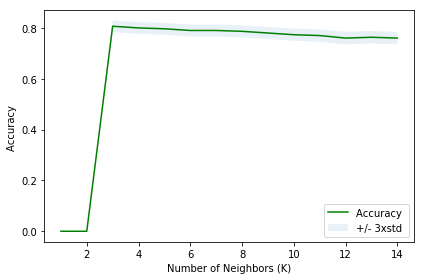

In [89]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [90]:
knn_f1_score = f1_score(y_test, y_predicted, average = 'weighted').round(2)
knn_f1_score

0.67

In [91]:
#Log Loss

for n in range(3, ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X, y)
    y_predicted_knn = neigh.predict_proba(X_test)[:,1]

print(y_predicted_knn[0:10])

[0.35714286 0.14285714 0.         0.35714286 0.14285714 0.28571429
 0.35714286 0.35714286 0.14285714 0.28571429]


In [92]:
knn_logloss = log_loss(y_test, y_predicted_knn, eps=1e-15,normalize = True).round(2)
knn_logloss

0.49

## Summary

In [93]:
finalreport = {'KNN':[knn_jaccard, knn_f1_score, knn_logloss], 'Decision Tree':[acc_jacc_dt, acc_f1_dt, acc_logloss_dt], 'SVM': [acc_jacc_svm, acc_f1_svm, acc_logloss_svm], 'Logistic Regression': [acc_jacc_LR,acc_f1_LR, acc_logloss_LR]}

In [94]:
finalreport

{'Decision Tree': [0.81, 0.81, 2.72],
 'KNN': [0.81, 0.67, 0.49],
 'Logistic Regression': [0.76, 0.86, 8.29],
 'SVM': [0.76, 0.66, 0.55]}

In [95]:
Report = pd.DataFrame(finalreport, index = ['Jacard\'s Index','F1 score','Log loss'])

In [96]:
Report

,Decision Tree,KNN,Logistic Regression,SVM
Jacard's Index,0.81,0.81,0.76,0.76
F1 score,0.81,0.67,0.86,0.66
Log loss,2.72,0.49,8.29,0.55


# Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
random_forest = RandomForestClassifier(n_estimators = 100, oob_score = True)
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [99]:
yhat_rf = random_forest.predict(X_test)

In [100]:
acc_rf= round(random_forest.score(X_train, y_train)* 100, 2)
acc_rf

100.0

This is the accuracy on train data. Now, let's find accuracy on <b>test</b> data

In [101]:
acc_rf_test= round(random_forest.score(X_test, y_test)* 100, 2)
acc_rf_test

79.0

Below you can see the code of the <b>hyperparamter tuning</b> for the parameters criterion, min_samples_leaf, min_samples_split and n_estimators.

In [103]:
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}

from sklearn.model_selection import GridSearchCV, cross_val_score

rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1, cv = 3)

In [104]:
clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 5, 10, 25, 50, 70], 'min_samples_split': [2, 4, 10, 12, 16, 18, 25, 35], 'n_estimators': [100, 400, 700, 1000, 1500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [108]:
clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=25,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

<b>Using best params for modelling

In [111]:
random_forest_cv = RandomForestClassifier(criterion = 'gini', min_samples_leaf = 1, min_samples_split = 25, n_estimators = 100, max_features = 'auto', oob_score = True, random_state = 1, n_jobs = -1)
random_forest_cv.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=25,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [113]:
acc_rf= round(random_forest_cv.score(X_train, y_train)* 100, 2)
acc_rf

89.14

In [114]:
yhat_rf = random_forest_cv.predict(X_test)

In [115]:
acc_rf_test= round(random_forest_cv.score(X_test, y_test)* 100, 2)
acc_rf_test

83.33

In [116]:
print('oob score: ', round(random_forest_cv.oob_score, 3) * 100, '%')

oob score:  100 %
